##### This Script does 
###### RFM Analysis
RFM => Recency, Frequency, Monetary value is a marketing analysis tool used to identify a company's or an organization's best customers by using certain measures. The RFM model is based on three quantitative factors:

###### Recency: How recently a customer has made a purchase

###### Frequency: How often a customer makes a purchase

###### Monetary Value: How much money a customer spends on purchases

RFM analysis numerically ranks a customer in each of these three categories, generally on a scale of 1 to 5 (the higher the number, the better the result). The "best" customer would receive a top score in every category.

The concept of recency, frequency, monetary value (RFM) is thought to date from an article by Jan Roelf Bult and Tom Wansbeek, "Optimal Selection for Direct Mail," published in a 1995 issue of Marketing Science. RFM analysis often supports the marketing adage that "80% of business comes from 20% of the customers."

Let's look more closely at how each RFM factor works, and how companies might strategize on the basis of it.

###### Recency 

The more recently a customer has made a purchase with a company, the more likely he or she will continue to keep the business and brand in mind for subsequent purchases. Compared with customers who have not bought from the business in months or even longer periods, the likelihood of engaging in future transactions with recent customers is arguably higher.

Such information can be used to remind recent customers to revisit the business soon to continue meeting their purchase needs. In an effort not to overlook lapsed customers, marketing efforts could be made to remind them that it has been a while since their last transaction while offering them an incentive to rekindle their patronage.

##### Frequency 

The frequency of a customer’s transactions may be affected by factors such as the type of product, the price point for the purchase, and the need for replenishment or replacement. If the purchase cycle can be predicted, for example when a customer needs to buy new groceries, marketing efforts could be directed towards reminding them to visit the business when items such as eggs or milk have been depleted.

##### Monetary Value 

Monetary value stems from the lucrativeness of expenditures the customer makes with the business during their transactions. A natural inclination is to put more emphasis on encouraging customers who spend the most money to continue to do so. While this can produce a better return on investment in marketing and customer service, it also runs the risk of alienating customers who have been consistent but have not spent as much with each transaction.

These three RFM factors can be used to reasonably predict how likely (or unlikely) it is that a customer will do business again with a firm or, in the case of a charitable organization, make another donation.

RFM analysis allows a comparison between potential contributors or clients. It gives organizations a sense of how much revenue comes from repeat customers (versus new customers), and which levers they can pull to try to make customers happier so they become repeat purchasers.

Despite the useful information that is acquired through RFM analysis, firms must take into consideration that even the best customers will not want to be over-solicited, and the lower-ranking customers may be cultivated with additional marketing efforts. It works as a snapshot of the clientele and as a tool to prioritize nurturing

In [1]:
## Import Required Libraries
import pandas as pd
print(f'pandas: {pd.__version__}') # Printing the version of pandas
import math
import numpy as np
print(f'numpy: {np.__version__}') # Printing the version of Numpy

import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta

from sklearn import preprocessing
# from sklearn.preprocessing import StandardScaler

from mpl_toolkits import mplot3d

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
# print(f'sklearn: {sklearn.cluster.__version__}')

pandas: 0.25.1
numpy: 1.16.5


In [2]:
# warnings.filterwarnings("ignore")
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
# mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
%matplotlib inline

In [3]:
# Data read - All Required data  are in datafolder
data_folder = "F:/BitsCourse/CapStoneProject/Retail_Customer_Analytics/2019AIML012"

df_org = pd.read_csv(data_folder+"/input_files/1-GR-29-Capstone_Customer_Retail_Analytics_Pass-1.csv")

print('Dataframe dimensions:', df_org.shape)

Dataframe dimensions: (379095, 17)


In [4]:
# show first 5 lines
df_org.head(5)

,InvoiceNo,ItemCode,item_Desc,Quantity,InvoiceDate,UnitPrice,CustomerID,CustomerName,Country,year,month,day,YearMonth,Revenue,MinPurchaseDate,MinPurchaseYearMonth,UserType
0,536365,10742201412,Microclimate Headband-Black/Black,6,2010-12-01 08:26:00,2.55,17850.0,Matthew-Clark,Argentina.,2010,12,1,201012,15.30,2010-12-01 08:26:00,201012,New
1,536365,10742201610,Microclimate Headband-Blazing Orange/Charcoal,6,2010-12-01 08:26:00,3.39,17850.0,Matthew-Clark,Argentina.,2010,12,1,201012,20.34,2010-12-01 08:26:00,201012,New
2,536365,10742201719,Microclimate Headband-Coral Rose/Charcoal,8,2010-12-01 08:26:00,2.75,17850.0,Matthew-Clark,Argentina.,2010,12,1,201012,22.00,2010-12-01 08:26:00,201012,New
3,536365,10742201818,SF-2 LS-Small,6,2010-12-01 08:26:00,3.39,17850.0,Matthew-Clark,Argentina.,2010,12,1,201012,20.34,2010-12-01 08:26:00,201012,New
4,536365,10742202211,SF-2 LS-Medium,6,2010-12-01 08:26:00,3.39,17850.0,Matthew-Clark,Argentina.,2010,12,1,201012,20.34,2010-12-01 08:26:00,201012,New


In [5]:
#% of missing values in each column
def find_missing_values_func(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [6]:
#Call the find_missing_values_func(df)
columnsWiseMissingValue = find_missing_values_func(df_org) 
print(columnsWiseMissingValue)
df_clean = df_org.copy(deep=True)

Selected dataframe has 17 columns.
There are 0 columns that have missing values.
Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []


In [7]:
df_clean.columns

Index(['InvoiceNo', 'ItemCode', 'item_Desc', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'CustomerName', 'Country', 'year', 'month',
       'day', 'YearMonth', 'Revenue', 'MinPurchaseDate',
       'MinPurchaseYearMonth', 'UserType'],
      dtype='object')

#  RFM Modeling

To do the RFM analysis, we need to create 3 features from the data

In [8]:
def RFM_Features(df, customerID, invoiceDate, transID, sales):
    ''' Create the Recency, Frequency, and Monetary features from the data '''
    # Final date in the data + 1 to create latest date
    latest_date = pd.to_datetime(df[invoiceDate].max()) + timedelta(1)
    # RFM feature creation
    RFMScores = df.groupby(customerID).agg({invoiceDate: lambda x: (latest_date - pd.to_datetime(x.max())).days, 
                                          transID: lambda x: len(x), 
                                          sales: lambda x: sum(x)})
    
    # Converting invoiceDate to int since this contains number of days
    RFMScores[invoiceDate] = RFMScores[invoiceDate].astype(int)
    
    # Renaming column names to Recency, Frequency and Monetary
    RFMScores.rename(columns={invoiceDate: 'Recency', 
                         transID: 'Frequency', 
                         sales: 'Monetary'}, inplace=True)
    
    return RFMScores.reset_index()

In [9]:
df_clean.head(5)

,InvoiceNo,ItemCode,item_Desc,Quantity,InvoiceDate,UnitPrice,CustomerID,CustomerName,Country,year,month,day,YearMonth,Revenue,MinPurchaseDate,MinPurchaseYearMonth,UserType
0,536365,10742201412,Microclimate Headband-Black/Black,6,2010-12-01 08:26:00,2.55,17850.0,Matthew-Clark,Argentina.,2010,12,1,201012,15.30,2010-12-01 08:26:00,201012,New
1,536365,10742201610,Microclimate Headband-Blazing Orange/Charcoal,6,2010-12-01 08:26:00,3.39,17850.0,Matthew-Clark,Argentina.,2010,12,1,201012,20.34,2010-12-01 08:26:00,201012,New
2,536365,10742201719,Microclimate Headband-Coral Rose/Charcoal,8,2010-12-01 08:26:00,2.75,17850.0,Matthew-Clark,Argentina.,2010,12,1,201012,22.00,2010-12-01 08:26:00,201012,New
3,536365,10742201818,SF-2 LS-Small,6,2010-12-01 08:26:00,3.39,17850.0,Matthew-Clark,Argentina.,2010,12,1,201012,20.34,2010-12-01 08:26:00,201012,New
4,536365,10742202211,SF-2 LS-Medium,6,2010-12-01 08:26:00,3.39,17850.0,Matthew-Clark,Argentina.,2010,12,1,201012,20.34,2010-12-01 08:26:00,201012,New


In [10]:
RFM = RFM_Features(df=df_clean, customerID= "CustomerID", invoiceDate = "InvoiceDate", transID= "InvoiceNo", sales="Revenue")
RFM.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,317,1,77183.60
1,12347.0,31,171,4085.18
2,12348.0,67,27,1437.24
3,12349.0,10,72,1457.55
4,12350.0,302,16,294.40


In [11]:
# Creating quantiles 
Quantiles = RFM[['Recency', 'Frequency', 'Monetary']].quantile([0.2, 0.4, 0.6, 0.8])
Quantiles = Quantiles.to_dict()
Quantiles

{'Recency': {0.2: 13.0, 0.4: 32.0, 0.6: 69.0, 0.8: 178.0},
 'Frequency': {0.2: 13.0, 0.4: 28.0, 0.6: 56.19999999999982, 0.8: 117.0},
 'Monetary': {0.2: 243.996,
  0.4: 472.7560000000002,
  0.6: 904.1279999999999,
  0.8: 1964.3940000000023}}

In [12]:
# Creating RFM ranks
def RFMRanking(x, variable, quantile_dict):
    ''' Ranking the Recency, Frequency, and Monetary features based on quantile values 
        1 is Lower Ranking whereas 5 is Higher Ranking.
    '''
    
    # checking if the feature to rank is Recency
    if variable == 'Recency':
        if x <= quantile_dict[variable][0.2]:
            return 5
        elif (x > quantile_dict[variable][0.2]) & (x <= quantile_dict[variable][0.4]):
            return 4
        elif (x > quantile_dict[variable][0.4]) & (x <= quantile_dict[variable][0.6]):
            return 3
        elif (x > quantile_dict[variable][0.6]) & (x <= quantile_dict[variable][0.8]):
            return 2
        else:
            return 1
    
    # checking if the feature to rank is Frequency and Monetary
    if variable in ('Frequency','Monetary'):
        if x <= quantile_dict[variable][0.2]:
            return 1
        elif (x > quantile_dict[variable][0.2]) & (x <= quantile_dict[variable][0.4]):
            return 2
        elif (x > quantile_dict[variable][0.4]) & (x <= quantile_dict[variable][0.6]):
            return 3
        elif (x > quantile_dict[variable][0.6]) & (x <= quantile_dict[variable][0.8]):
            return 4
        else:
            return 5

In [13]:
RFM['R'] = RFM['Recency'].apply(lambda x: RFMRanking(x, variable='Recency', quantile_dict=Quantiles))
RFM['F'] = RFM['Frequency'].apply(lambda x: RFMRanking(x, variable='Frequency', quantile_dict=Quantiles))
RFM['M'] = RFM['Monetary'].apply(lambda x: RFMRanking(x, variable='Monetary', quantile_dict=Quantiles))

In [14]:
RFM.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M
0,12346.0,317,1,77183.60,1,1,5
1,12347.0,31,171,4085.18,4,5,5
2,12348.0,67,27,1437.24,3,2,4
3,12349.0,10,72,1457.55,5,4,4
4,12350.0,302,16,294.40,1,2,2


In [15]:
RFM['Group'] = RFM['R'].astype(str) + RFM['F'].astype(str) + RFM['M'].astype(str)
RFM.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,Group
0,12346.0,317,1,77183.60,1,1,5,115
1,12347.0,31,171,4085.18,4,5,5,455
2,12348.0,67,27,1437.24,3,2,4,324
3,12349.0,10,72,1457.55,5,4,4,544
4,12350.0,302,16,294.40,1,2,2,122


In [16]:
# Check the number of score segments
RFM.Group.value_counts()

555    274
111    253
455    197
122    151
211    125
      ... 
515      2
352      2
252      1
125      1
152      1
Name: Group, Length: 119, dtype: int64

In [17]:
RFM["Score"] = (RFM[['R', 'F', 'M']].sum(axis=1))/15
RFM.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,Group,Score
0,12346.0,317,1,77183.60,1,1,5,115,0.466667
1,12347.0,31,171,4085.18,4,5,5,455,0.933333
2,12348.0,67,27,1437.24,3,2,4,324,0.600000
3,12349.0,10,72,1457.55,5,4,4,544,0.866667
4,12350.0,302,16,294.40,1,2,2,122,0.333333


In [18]:
# Loyalty levels
loyalty = ['Rare', 'Occasional', 'Average', 'Frequent', 'Loyal']
RFM['Loyalty_Level'] = pd.qcut(RFM['Score'], q=5, labels= loyalty)
RFM.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,Group,Score,Loyalty_Level
0,12346.0,317,1,77183.60,1,1,5,115,0.466667,Occasional
1,12347.0,31,171,4085.18,4,5,5,455,0.933333,Loyal
2,12348.0,67,27,1437.24,3,2,4,324,0.600000,Average
3,12349.0,10,72,1457.55,5,4,4,544,0.866667,Frequent
4,12350.0,302,16,294.40,1,2,2,122,0.333333,Rare


In [19]:
behaviour = RFM.groupby('Loyalty_Level')[['Recency', 'Frequency', 'Monetary', 'Score']].mean()
behaviour

,Recency,Frequency,Monetary,Score
Loyalty_Level,,,,
Rare,213.926857,11.564571,212.604891,0.274819
Occasional,108.200180,26.962298,621.636203,0.468582
Average,62.341301,52.691899,935.680478,0.633643
Frequent,33.674661,109.225235,1952.258571,0.799861
Loyal,10.896959,328.574324,8095.474392,0.964189


# Conclusion

Customer Behaviour and potential targeting techniques for each Loyalty Level:

##### Loyal Customers:  (Score 0.964189)

People in this group are more frequent buyers with average days since the last purchase is 11 and average number 
of times they have transacted in the platform is about 329 times in the last 1 year. Also, their average sales value 
is 8K Rupies. These are your most loyal customers, who bought recently, most often, and are heavy spenders. Reward 
these customers so that they can become an early adopters for your future products and help to promote your brand.

##### Frequent Customers: (Score 0.799861)

People in this group are more frequent buyers with average days since the last purchase is 34 and average number 
of times they have transacted in the platform is about 109 times in the last 1 year. Also, their average sales value 
is 2K Rupies. These are also, like VIP Customers, your most loyal customers, who bought recently, most often, and almost heavy spenders. Reward these customers so that they can become an early adopters for your future products and help to promote your brand.

##### Average Customers:  (Score 0.633643)

This group has an average frequency of 52.5 times and recency of 62 days. This group is also high spenders with average 
sales of about 935 Rupies. These are your recent customers with an average frequency and who spent a good amount. 
Offer membership or loyalty programs or recommend related products to upsell them and help them become your Platinum or VIP Platinum members.

##### Occasional Customers: (Score 0.468582)

People in this group have made a transaction on the platform about 108 days ago. Their frequency and monetary values 
are 27 times and 621.5 Rupies respectively. These are your customers who purchased a decent number of times and spent good 
amounts, but haven’t purchased recently. Sending them personalized campaigns, offers, and product recommendations will 
help to reconnect with them.

##### Rare Customers: (Score 0.274819)

This is the dormant group with average days since their last purchase is 214. They have transacted around 12 times 
in the platform with average sales of 212.5 Rupies. These are customers who used to visit and purchase in your platform, 
but haven’t been visiting recently. Bring them back with relevant promotions, and run surveys to find out what went 
wrong and avoid losing them to a competitor.

# Visualising Customers of different Segment

In [20]:
# count the number of customers in each segment
segment_population = RFM['Loyalty_Level'].value_counts()
segment_population = segment_population.reindex(index = ['Rare', 'Occasional', 'Average', 'Frequent', 'Loyal'])



Customers Segmentation as per RFM ranking, Rule based clustering, with predefined Qunatiles on 20%, 40%, 60% 80% and 100%


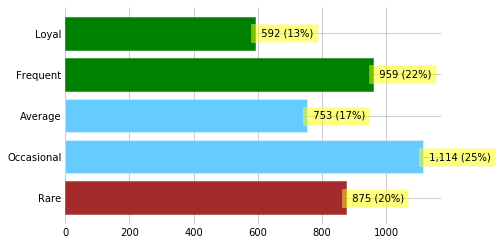

In [21]:
def drawSegmentationGraph(segment_population, green_list, brown_list):
    fig, ax = plt.subplots()

    h_bars = ax.barh(range(len(segment_population)),
                  segment_population,
                  color='#66CCFF')
    ax.set_frame_on(False)
    ax.tick_params(left=False,
                   bottom=False,
                   labelbottom=True)
    ax.set_yticks(range(len(segment_population)))
    ax.set_yticklabels(segment_population.index)

    for i, bar in enumerate(h_bars):
            value = bar.get_width()
            if segment_population.index[i] in green_list:
                bar.set_color('green')
            if segment_population.index[i] in brown_list:
                bar.set_color('brown')
            ax.text(value,
                    bar.get_y() + bar.get_height()/2,
                    '  {:,} ({:}%)'.format(int(value),
                                       int(value*100/segment_population.sum())),
                    va='center',
                    ha='left',
                    bbox=dict(facecolor='yellow', alpha=0.5)
                   )
    
    plt.show()
    
print('\n\nCustomers Segmentation as per RFM ranking, Rule based clustering, with predefined Qunatiles on 20%, 40%, 60% 80% and 100%')
drawSegmentationGraph(segment_population, ['Loyal', 'Frequent'], ['Rare'])

In [22]:
RFM.shape

(4293, 10)

# Conclusion

We have total 35% Customers in Frequent and Loyal Segment. This is a good number, should make some efforts to convert Frequent Customers to Loyal Customers.

Out of 4293 Customers, We have 20% i.e. every fifth customer, in Rare Category. Need to take precaution measure immidiately to save these customers falling for compatitors. 

We have 25% i.e. every 4th Customer in Occasional Customer category. Including Avergae Category we have total 42% Customers in Occasional and Average Category. There is huge number of Customers in these two categories, neither Rare, nor Frequent, on border line. There is a very good scope to convert these Customers of these segment upword to Frequent or Loyal.  

In [23]:
RFM.describe()

,CustomerID,Recency,Frequency,Monetary,R,F,M,Score
count,4293.000000,4293.000000,4293.000000,4293.000000,4293.000000,4293.000000,4293.000000,4293.000000
mean,15301.483345,91.639646,88.305381,1921.229029,3.010948,2.994875,3.000000,0.600388
std,1721.088497,98.731629,216.021829,8274.311841,1.419023,1.415851,1.414543,0.236332
min,12346.000000,1.000000,1.000000,2.900000,1.000000,1.000000,1.000000,0.200000
25%,13815.000000,16.000000,17.000000,302.250000,2.000000,2.000000,2.000000,0.400000
50%,15298.000000,50.000000,40.000000,653.240000,3.000000,3.000000,3.000000,0.600000
75%,16781.000000,146.000000,97.000000,1573.200000,4.000000,4.000000,4.000000,0.800000
max,18287.000000,365.000000,7368.000000,267410.000000,5.000000,5.000000,5.000000,1.000000


### Max-Min range and STD of Monetary column are very high. To take care of this problem, we will transform all the variables on the log scale.

In [24]:
# a log of a number that is less than or equal to zero. That's mathematically undefined, 
# Drop all rows where Frequency <= 0 as when Frequency = 0 , Monetary  is also 0
print(f'Befor {RFM.shape}')
RFM.drop(RFM[RFM.Frequency == 0].index, inplace=True)
print(f'After {RFM.shape}\n\nNo Change detected.')

Befor (4293, 10)
After (4293, 10)

No Change detected.


In [25]:
RFM['recency_log'] = RFM['Recency'].apply(math.log)
RFM['frequency_log'] = RFM['Frequency'].apply(math.log)
RFM['Monetary_log'] = RFM['Monetary'].apply(math.log)

feature_vector = ['Monetary_log', 'recency_log','frequency_log', 'CustomerID']
RFM_log = RFM[feature_vector].set_index('CustomerID')  


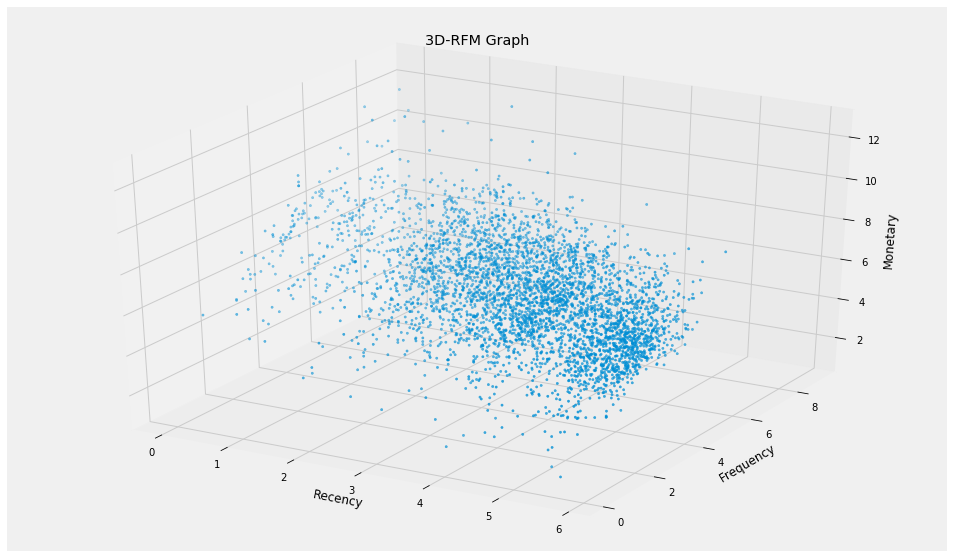

In [26]:
r_log = RFM_log['recency_log'] 
f_log = RFM_log['frequency_log']
m_log = RFM_log['Monetary_log'] 
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(r_log,f_log,m_log,s=5)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title('3D-RFM Graph')
plt.show()

Above graph Shows 3D impression of three features Recency, Frequency and Monetory. But above graph is not interactive we will look at below table of graphs which gives us 2D graph for each face of above 3D graph, explaining corelation between all posible combination 2 features.

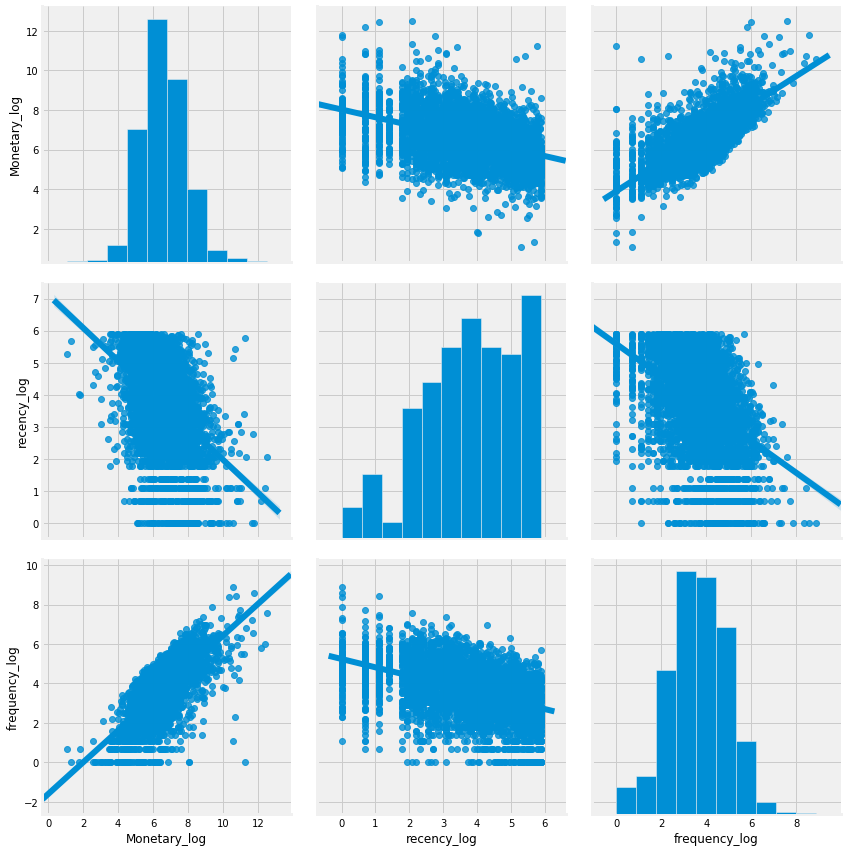

In [27]:
# with regression
sns.pairplot(RFM_log, kind="reg", height=4, aspect =1)
plt.show()
 

# Conclusion

The Diagonal graphs give you feature distribution. e.g. graph [0,0] is distribution of feature Monetory_log. graph [1,1] for recency_log and graph[2,2] for frequcy_log.

Graph [0,1] : Gives view with recency_log on x-axis and Monetory_log on y-axis. grpah[1,0] is just axis interchange. Both Graphs shows, a general rule as Recency value increases ,means if Customer not purchased recently, for that Customer Monetory value decreases. i.e. Recency and Monetory are inversely praportional, which means more recently Customer purchased in shop,  Customer has spend more money in Shop and vice versa, if Customer has not spend more money in Shop Customer might not have purchased recently.  

Graph [0,2] : Gives face of 3D graph above where frequency_log on x-axis and Monetory_log on y-axis. grpah[2,0] is just axis interchange. Both Graphs shows, a strong rule as Frequncy increases for a Customer Monetory value also increase. i.e. Frequncy and Monetory are directly praportional, which means more frequently Customer purchased in Shop Customer spends more money in Shop and vice versa if Customer is spending more Money most probably it is more Frequent Customer.

Graph [1,2] : Gives face of 3D graph above where frequency_log on x-axis and recency_log on y-axis. grpah[2,1] is just axis interchange. Both Graphs shows, a general rule as Frequncy value increases for a Customer Recency value decreses. i.e. Frequncy and Recency are inversely praportional, which means more frequently Customer purchased in Shop Customer must have purchased recently in Shop and vice versa if Customer has not purchased recently it might not be a frequent buyer.

# Clustering for Segments

### Elbow Method for optimal value of k in KMeans

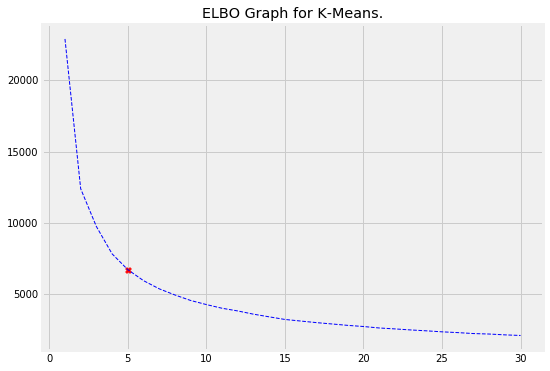

5 is Optimal value for Number of Clusters, using KMeans Algorithm For Given hyper-parameters.


In [28]:
def optimalKValue (df):
    itrations = 30
    closestCluster = 0.125
    bestClusterNo = itrations
    best_cluster_err = 0.0

    minumum_err = 9999999999999 #Some large Number
    cost = [] 


    for k in range (itrations):
        model = KMeans(
            n_clusters=k+1, 
            init='k-means++', 
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=110) ## random_state helps ensure same results always

        model = model.fit(df)

        # Sum of distances of samples to their closest cluster center
        curr_err = model.inertia_
        if (bestClusterNo == itrations) and (((minumum_err - curr_err)/minumum_err) < closestCluster): 
            bestClusterNo = k
            best_cluster_err = minumum_err
        cost.append(curr_err)
        minumum_err = curr_err

    plt.figure(figsize=(8, 6))

    plt.plot(range (1, itrations+1), cost, c='blue', linestyle='dashed', linewidth=1)
    plt.scatter(bestClusterNo, best_cluster_err, c='red', marker='X')
    plt.title('ELBO Graph for K-Means.')
    plt.show()
    return bestClusterNo

bestClusterNo = optimalKValue(RFM_log)
print(f'{bestClusterNo} is Optimal value for Number of Clusters, using KMeans Algorithm For Given hyper-parameters.') 

In [29]:
# Create a kmeans model with the best K.

model = KMeans(n_clusters=bestClusterNo, init='k-means++', n_init=30,max_iter=300, tol=1e-04, random_state=110)

# Scaling the data . Required for good fit .
model = model.fit(RFM_log)


# Find number of clusters the first cluster has label 0, and the second has label 1.
labels = model.labels_
RFM_log['cluster_number'] = labels
pd.Series(labels).value_counts().sort_values()

3     621
1     665
4     750
0    1013
2    1244
dtype: int64

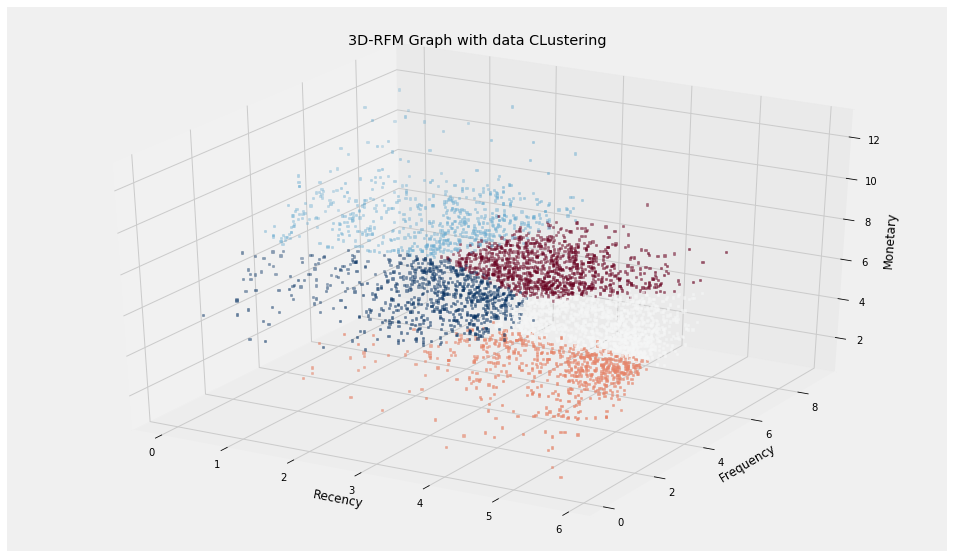

In [30]:
r_log = RFM_log['recency_log'] 
f_log = RFM_log['frequency_log']
m_log = RFM_log['Monetary_log'] 
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(r_log,f_log,m_log,s=5, marker="s",c=RFM_log['cluster_number'], cmap="RdBu")

# print(f'r {r_log.min()} to {r_log.max()}')
# print(f'f {f_log.min()} to {f_log.max()}')
# print(f'm {m_log.min()} to {m_log.max()}')

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title('3D-RFM Graph with data CLustering')
plt.show()

Above Graph shows 5 Clusters of data we obtained by K-Means Algorith.

In [31]:
RFM_log

,Monetary_log,recency_log,frequency_log,cluster_number
CustomerID,,,,
12346.0,11.253942,5.758902,0.000000,2
12347.0,8.315121,3.433987,5.141664,0
12348.0,7.270480,4.204693,3.295837,2
12349.0,7.284512,2.302585,4.276666,0
12350.0,5.684939,5.710427,2.772589,2
...,...,...,...,...
18280.0,5.196285,5.594711,2.302585,1
18281.0,4.392224,5.147494,1.945910,1
18282.0,4.607268,4.770685,1.945910,1


In [32]:
RFM_log = pd.merge(RFM_log, RFM[['Score', 'CustomerID']], on='CustomerID')
RFM_log

,CustomerID,Monetary_log,recency_log,frequency_log,cluster_number,Score
0,12346.0,11.253942,5.758902,0.000000,2,0.466667
1,12347.0,8.315121,3.433987,5.141664,0,0.933333
2,12348.0,7.270480,4.204693,3.295837,2,0.600000
3,12349.0,7.284512,2.302585,4.276666,0,0.866667
4,12350.0,5.684939,5.710427,2.772589,2,0.333333
...,...,...,...,...,...,...
4288,18280.0,5.196285,5.594711,2.302585,1,0.200000
4289,18281.0,4.392224,5.147494,1.945910,1,0.266667
4290,18282.0,4.607268,4.770685,1.945910,1,0.266667
4291,18283.0,7.539522,0.000000,6.556778,3,0.933333


In [33]:

cluster_score_map = RFM_log[['cluster_number', 'Score']].groupby(by="cluster_number").mean().sort_values(by=['Score'], ascending=False)
cluster_loyalty_level = ['Loyal', 'Frequent', 'Average', 'Occasional', 'Rare']
# for i in range(bestClusterNo):
#     cluster_loyalty_level.append("Rank_"+str(i+1))
cluster_score_map['cluster_loyalty_level'] = cluster_loyalty_level
cluster_score_map

,Score,cluster_loyalty_level
cluster_number,,
3,0.949007,Loyal
0,0.766502,Frequent
4,0.624356,Average
2,0.448982,Occasional
1,0.277995,Rare


In [34]:
cluster_score_map = cluster_score_map.drop(columns=['Score'])
RFM_log = pd.merge(RFM_log, cluster_score_map, on='cluster_number')
RFM_log

,CustomerID,Monetary_log,recency_log,frequency_log,cluster_number,Score,cluster_loyalty_level
0,12346.0,11.253942,5.758902,0.000000,2,0.466667,Occasional
1,12348.0,7.270480,4.204693,3.295837,2,0.600000,Occasional
2,12350.0,5.684939,5.710427,2.772589,2,0.333333,Occasional
3,12354.0,6.984161,5.411646,4.060443,2,0.600000,Occasional
4,12355.0,6.129921,5.327876,2.564949,2,0.266667,Occasional
...,...,...,...,...,...,...,...
4288,18225.0,8.552336,2.564949,5.541264,3,1.000000,Loyal
4289,18229.0,8.892460,1.098612,5.099866,3,1.000000,Loyal
4290,18230.0,7.941011,0.000000,4.454347,3,0.933333,Loyal
4291,18241.0,7.636796,0.000000,4.644391,3,0.933333,Loyal


In [35]:
cluster_loyalty_level.reverse()
cluster_loyalty_level

['Rare', 'Occasional', 'Average', 'Frequent', 'Loyal']



Customers Segmentation as per RFM ranking, Rule based clustering, with predefined Qunatiles on 20%, 40%, 60% 80% and 100%


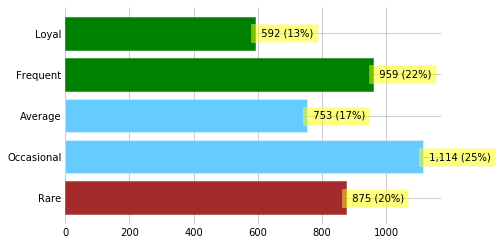



Customers Segmentation as per K-Means Clustering Algorithm.


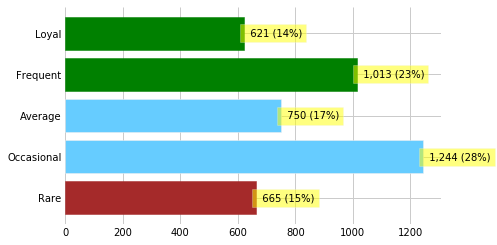

In [36]:

print('\n\nCustomers Segmentation as per RFM ranking, Rule based clustering, with predefined Qunatiles on 20%, 40%, 60% 80% and 100%')
segment_population = RFM['Loyalty_Level'].value_counts()
segment_population = segment_population.reindex(index = ['Rare', 'Occasional', 'Average', 'Frequent', 'Loyal'])
drawSegmentationGraph(segment_population, ['Frequent', 'Loyal'], ['Rare'])


print('\n\nCustomers Segmentation as per K-Means Clustering Algorithm.')
segment_population = RFM_log['cluster_loyalty_level'].value_counts()
segment_population = segment_population.reindex(index = cluster_loyalty_level)
drawSegmentationGraph(segment_population, cluster_loyalty_level[(len(cluster_loyalty_level)//5)*-2:], cluster_loyalty_level[:(len(cluster_loyalty_level)//5)*1])

# Conclusion

As we can see above Customer Segmentation using two approaches 

1) Rule Based : RFM ranking segementated on pre-defined Rules i.e. creating Buckets for 20%, 40%, 60%, 80% and 100%

2) UnSupervised Clustering : UnSupervised Clustering using K-Means Algorithm.

In Either approaches we observe Segmentaion is approximately similar, Chages we see as 1% Increase in Loyal and Frequent Customers. 3% Increase in Occasinal Customers, whereas 5% decrese in Rare Customers in Unsupervissed Clustering compare to RFM rule based segmentation.

In Both approaches we see considerable portion of Customer base in Rare Customer segment, which Shop needs to work upon so that it wont fall for Compatitors

Also in either cases we see major Customer base is in Average and Occasinal segment, collectively 42% in RFM rule based approach and 45% in Unsupervised Clusterig. Shop has major opportunity to implement some policies so that this customer base will move to Frequent and then in Loyal Customer base.

While doing that Shop also need to take care NOT to reduce Customer base in Loyal and Frequent segment. Shop seems to be doing great as in both approaches we see collectively in Loyal and Frequent segment we have 35% in RFM rule based approach whereas increased 37% in Unsupervised Clustering approach.

In [37]:
RFM_Kmeans = pd.merge(RFM, RFM_log[['cluster_number', 'cluster_loyalty_level', 'CustomerID']], on='CustomerID')
RFM_Kmeans = RFM_Kmeans.rename(columns = {'Loyalty_Level': 'RFM_LoyaltyLevel', 'cluster_number': 'KMeans_cluster_number', 'cluster_loyalty_level': 'KMeans_LoyaltyLevel'}, inplace = False)
RFM_Kmeans

,CustomerID,Recency,Frequency,Monetary,R,F,M,Group,Score,RFM_LoyaltyLevel,recency_log,frequency_log,Monetary_log,KMeans_cluster_number,KMeans_LoyaltyLevel
0,12346.0,317,1,77183.60,1,1,5,115,0.466667,Occasional,5.758902,0.000000,11.253942,2,Occasional
1,12347.0,31,171,4085.18,4,5,5,455,0.933333,Loyal,3.433987,5.141664,8.315121,0,Frequent
2,12348.0,67,27,1437.24,3,2,4,324,0.600000,Average,4.204693,3.295837,7.270480,2,Occasional
3,12349.0,10,72,1457.55,5,4,4,544,0.866667,Frequent,2.302585,4.276666,7.284512,0,Frequent
4,12350.0,302,16,294.40,1,2,2,122,0.333333,Rare,5.710427,2.772589,5.684939,2,Occasional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4288,18280.0,269,10,180.60,1,1,1,111,0.200000,Rare,5.594711,2.302585,5.196285,1,Rare
4289,18281.0,172,7,80.82,2,1,1,211,0.266667,Rare,5.147494,1.945910,4.392224,1,Rare
4290,18282.0,118,7,100.21,2,1,1,211,0.266667,Rare,4.770685,1.945910,4.607268,1,Rare
4291,18283.0,1,704,1880.93,5,5,4,554,0.933333,Loyal,0.000000,6.556778,7.539522,3,Loyal


# DBSCAN

In [38]:
RFM

,CustomerID,Recency,Frequency,Monetary,R,F,M,Group,Score,Loyalty_Level,recency_log,frequency_log,Monetary_log
0,12346.0,317,1,77183.60,1,1,5,115,0.466667,Occasional,5.758902,0.000000,11.253942
1,12347.0,31,171,4085.18,4,5,5,455,0.933333,Loyal,3.433987,5.141664,8.315121
2,12348.0,67,27,1437.24,3,2,4,324,0.600000,Average,4.204693,3.295837,7.270480
3,12349.0,10,72,1457.55,5,4,4,544,0.866667,Frequent,2.302585,4.276666,7.284512
4,12350.0,302,16,294.40,1,2,2,122,0.333333,Rare,5.710427,2.772589,5.684939
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4288,18280.0,269,10,180.60,1,1,1,111,0.200000,Rare,5.594711,2.302585,5.196285
4289,18281.0,172,7,80.82,2,1,1,211,0.266667,Rare,5.147494,1.945910,4.392224
4290,18282.0,118,7,100.21,2,1,1,211,0.266667,Rare,4.770685,1.945910,4.607268
4291,18283.0,1,704,1880.93,5,5,4,554,0.933333,Loyal,0.000000,6.556778,7.539522


In [39]:

RFM_dbscan = RFM[['recency_log','frequency_log','Monetary_log','CustomerID']].set_index('CustomerID')  

model = DBSCAN(eps=0.1, min_samples=5).fit(RFM_dbscan)
labels = model.labels_
RFM_dbscan['cluster_number'] = labels
label_cnt = pd.Series(labels).value_counts().sort_values()
label_cnt

 33       4
 28       5
 24       5
 8        5
 20       5
 25       5
 17       5
 21       5
 31       5
 6        5
 10       5
 23       5
 18       5
 26       5
 34       5
 15       5
 32       5
 35       5
 11       5
 5        5
 29       6
 22       6
 30       6
 4        6
 7        7
 13       7
 19       7
 27       7
 16       8
 9        8
 12       9
 2       11
 14      12
 3       16
 1       17
 0       63
-1     3998
dtype: int64

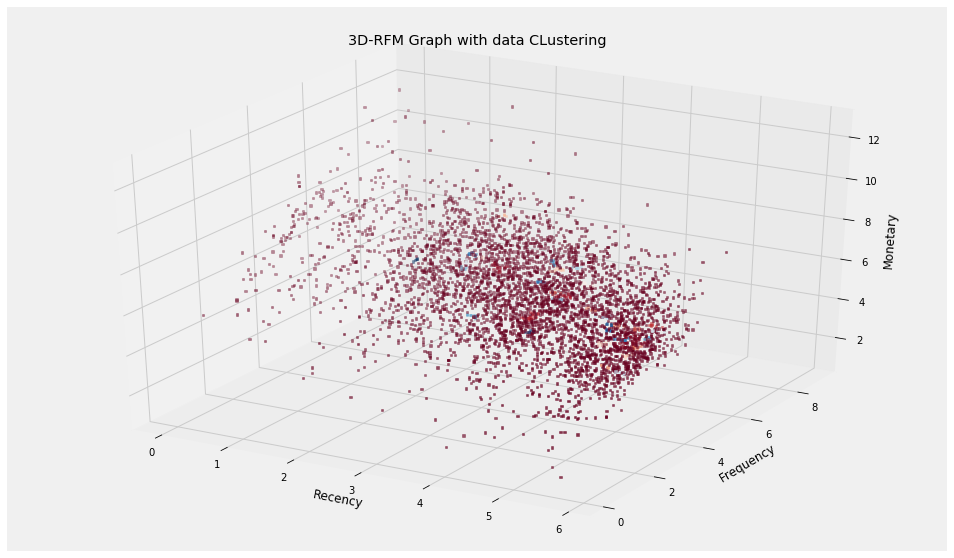

In [40]:
r_log = RFM_dbscan['recency_log'] 
f_log = RFM_dbscan['frequency_log']
m_log = RFM_dbscan['Monetary_log'] 
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(r_log,f_log,m_log,s=5, marker="s",c=RFM_dbscan['cluster_number'], cmap="RdBu")

# print(f'r {r_log.min()} to {r_log.max()}')
# print(f'f {f_log.min()} to {f_log.max()}')
# print(f'm {m_log.min()} to {m_log.max()}')

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title('3D-RFM Graph with data CLustering')
plt.show()

As We can see in above graph, there are no clear densitywise clear Clusters, makes it improper to use DBSCAN algorithm to find clusters based on Density. In above Label distribution list we can observe (and tried on various combination of hyper-parameter min-samples and epsilon) that clusters based on desnsity does not carry much information and majority if inputs fall in non-cluster label, i.e. -1 

# END of RFM Analysis Next step CLTV clustering

In [41]:
#  Saving RFM and K-Means Clustering in out-put file for further analysis.
RFM_Kmeans.to_csv(data_folder+"/output_files/2-GR-29-Capstone_Customer_Retail_Analytics_Pass-2-RFM_and_K-Means_Clustering.csv",index=False)
RFM_Kmeans.to_csv(data_folder+"/input_files/2-GR-29-Capstone_Customer_Retail_Analytics_Pass-2-RFM_and_K-Means_Clustering.csv",index=False)